In [47]:
import numpy as np
import pandas as pd
from os.path import join
from pyimzml.ImzMLParser import ImzMLParser
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [9]:
# Define folder that contains the preprocessed dhg dataset
DHG_IN_PATH = "/sise/assafzar-group/assafzar/Leor/DHG/Preprocessed"
# Define file to export
META_DATA_PATH = "/sise/assafzar-group/assafzar/Leor/DHG/Preprocessed/Metadata.csv"

In [10]:
# 
meta_data = pd.read_csv(META_DATA_PATH)

In [11]:
mean_spectras = {}
mzs = None
for sample in tqdm(meta_data.file_name.unique()):
  mean_spectra = 0
  # Parse the MSI file containing ROI
  with ImzMLParser(join(DHG_IN_PATH, f"{sample}.imzML")) as reader:
    # Loop over each spectra in MSI
    for idx, (x, y, z) in tqdm(enumerate(reader.coordinates), total=len(reader.coordinates), desc="Spectra Loop"):
      # Check if spectra is in ROI boundaries
      mzs, intensities = reader.getspectrum(idx)
      mean_spectra += intensities
    mean_spectra /= len(reader.coordinates)
  mean_spectras[sample] = mean_spectra

  0%|          | 0/48 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2304 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2254 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2596 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2772 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2898 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2508 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3871 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2928 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3604 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1584 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1620 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1377 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3484 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2916 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2852 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2583 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4400 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2184 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1850 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1710 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1395 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1470 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4896 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1886 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4026 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1856 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2412 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4875 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4368 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3074 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3465 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4422 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4488 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3111 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/5934 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3658 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4500 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3835 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4256 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3477 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/5135 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2562 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3111 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1496 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/1452 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/2184 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/4420 [00:00<?, ?it/s]

Spectra Loop:   0%|          | 0/3192 [00:00<?, ?it/s]

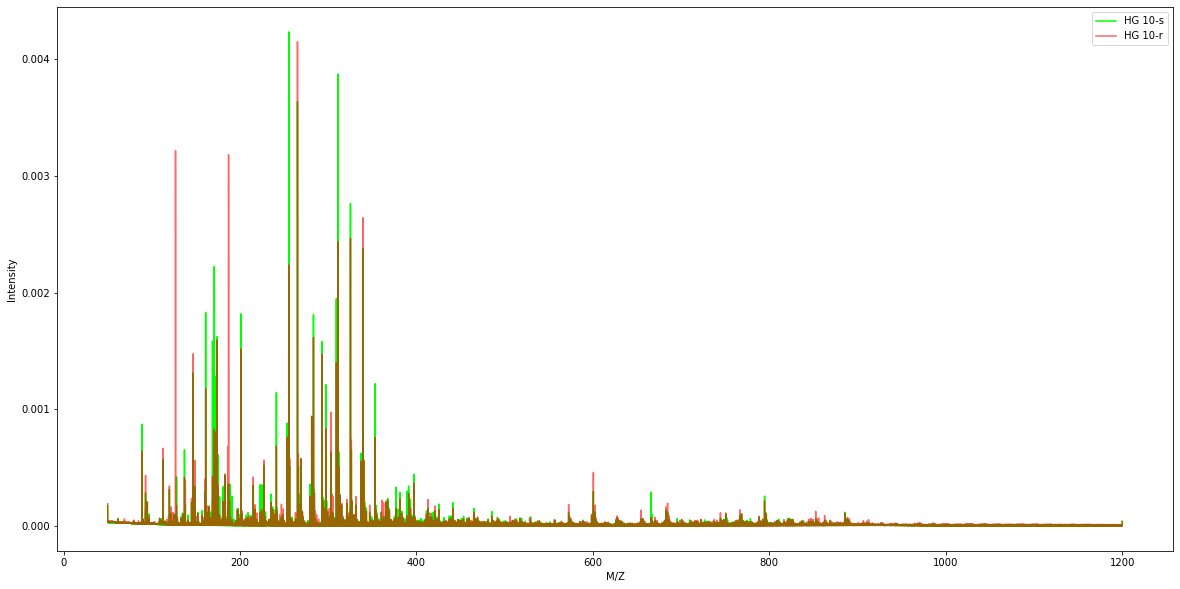

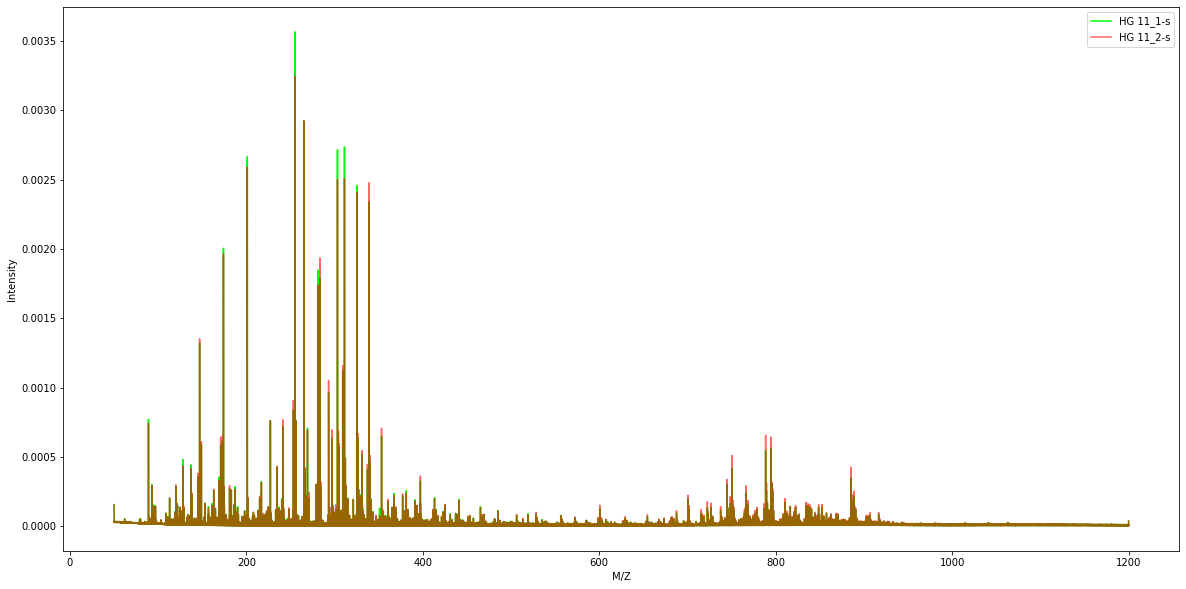

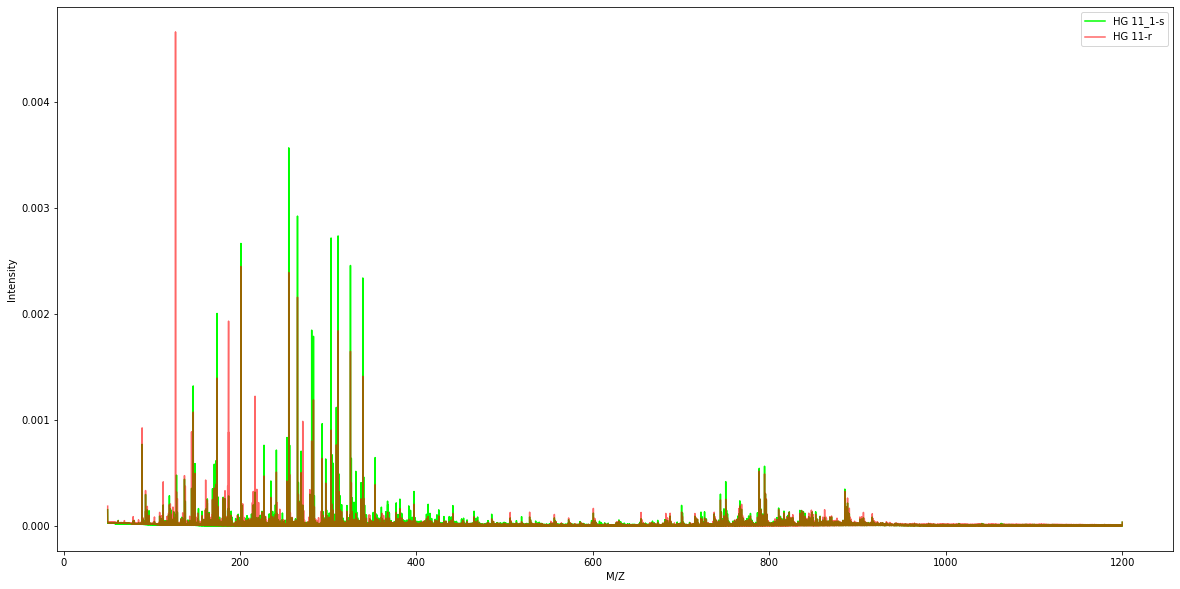

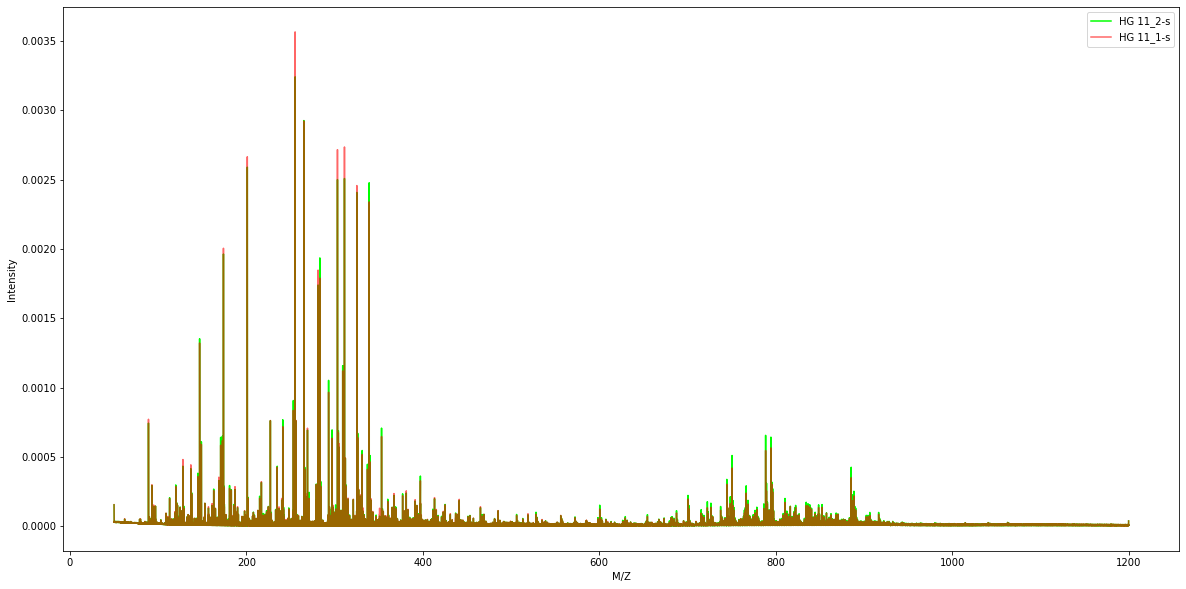

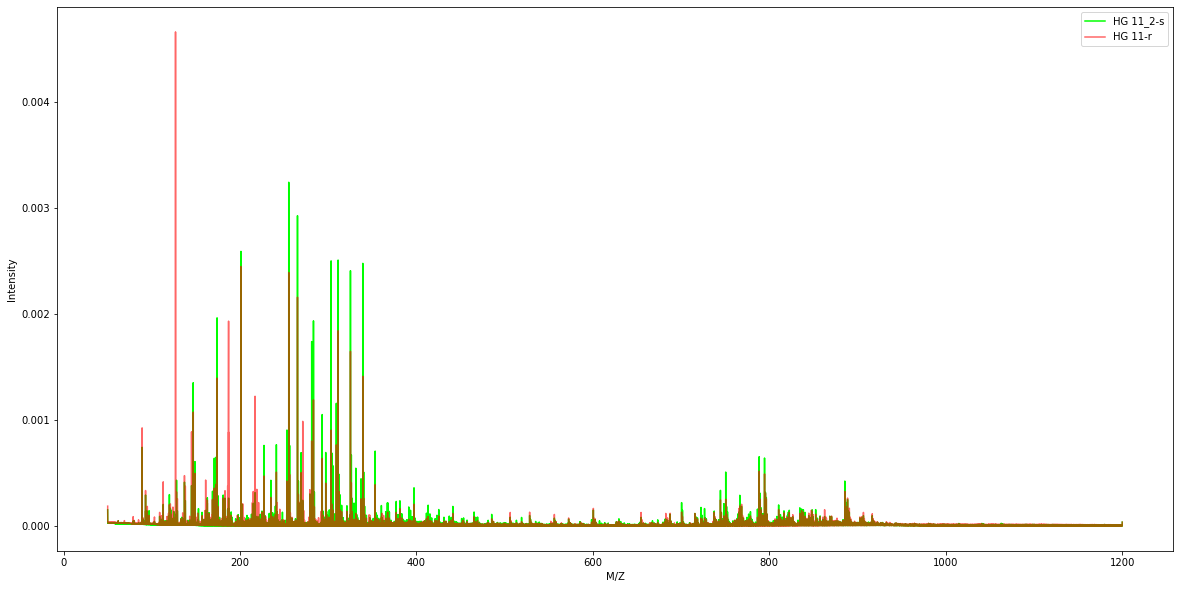

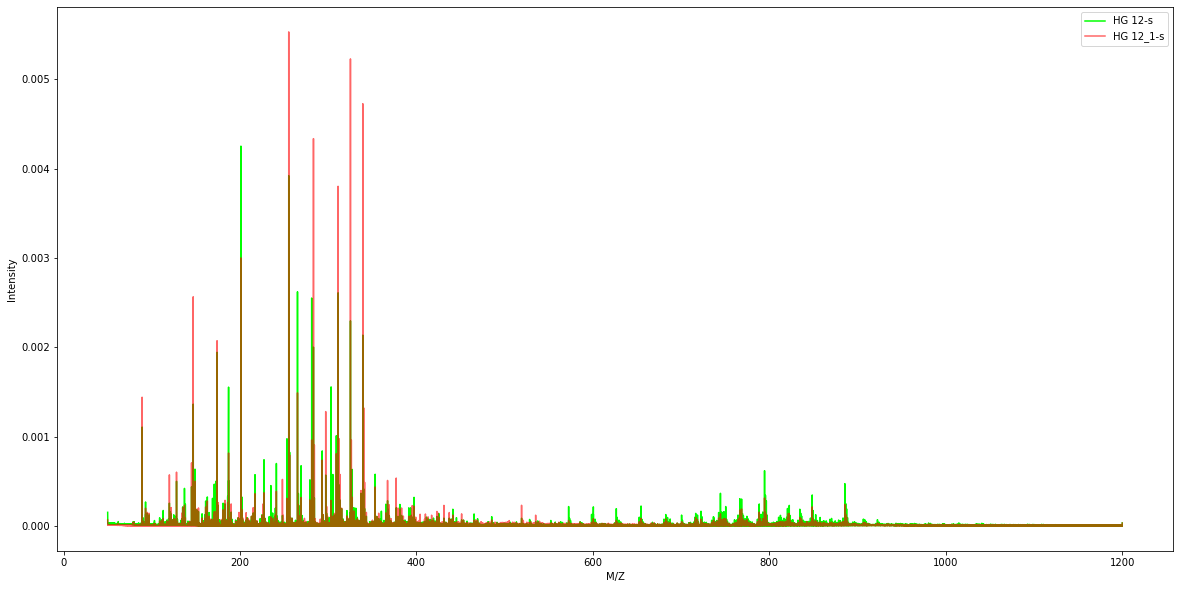

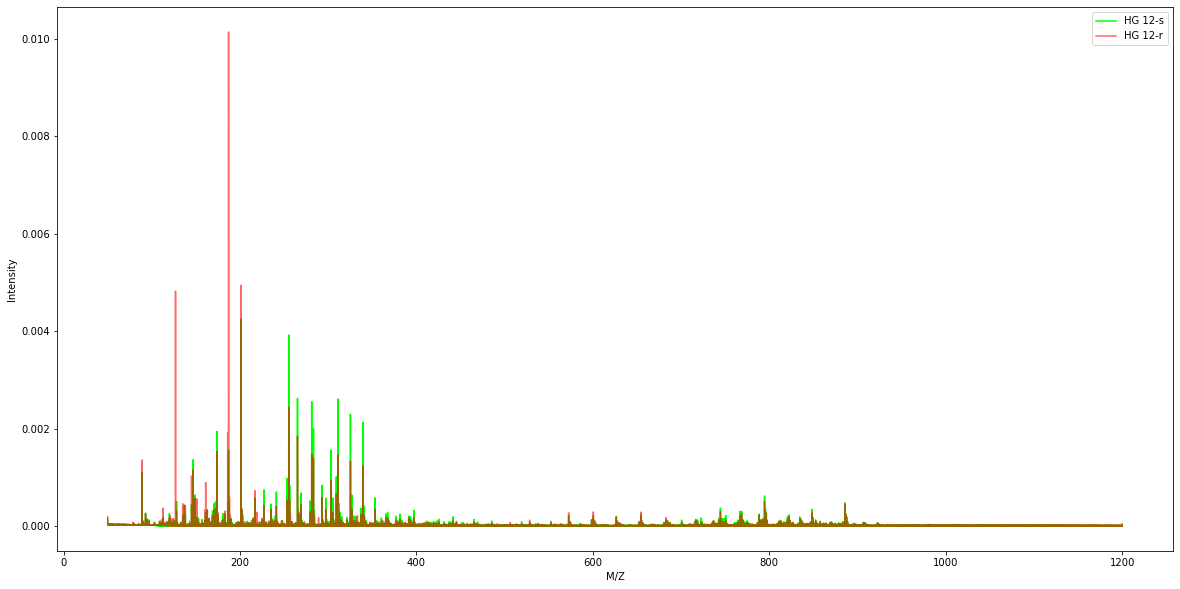

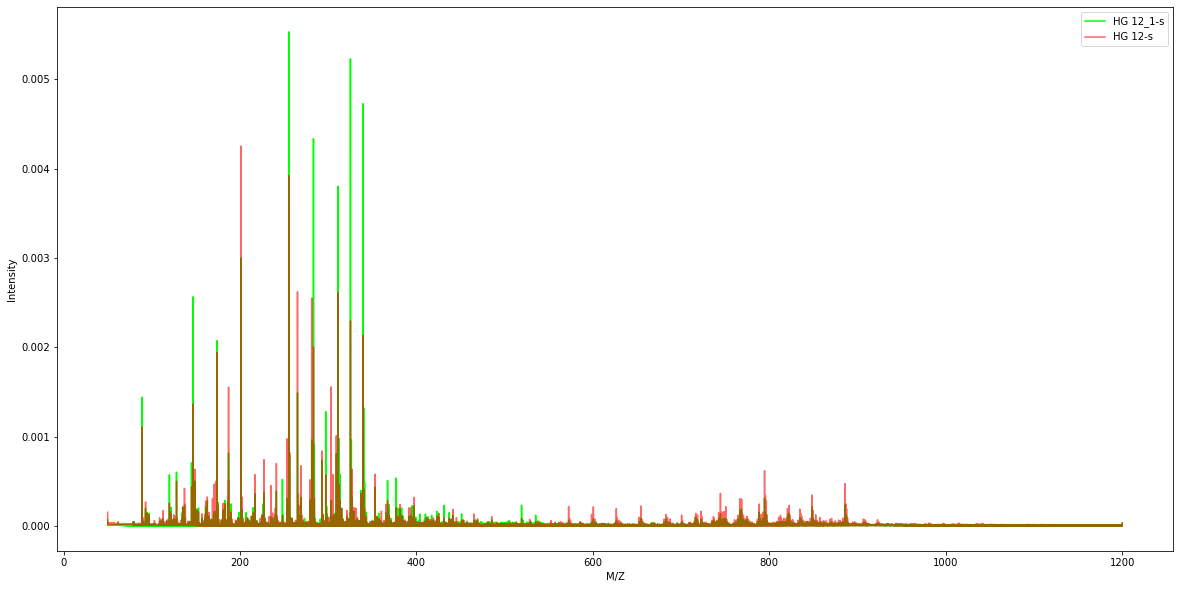

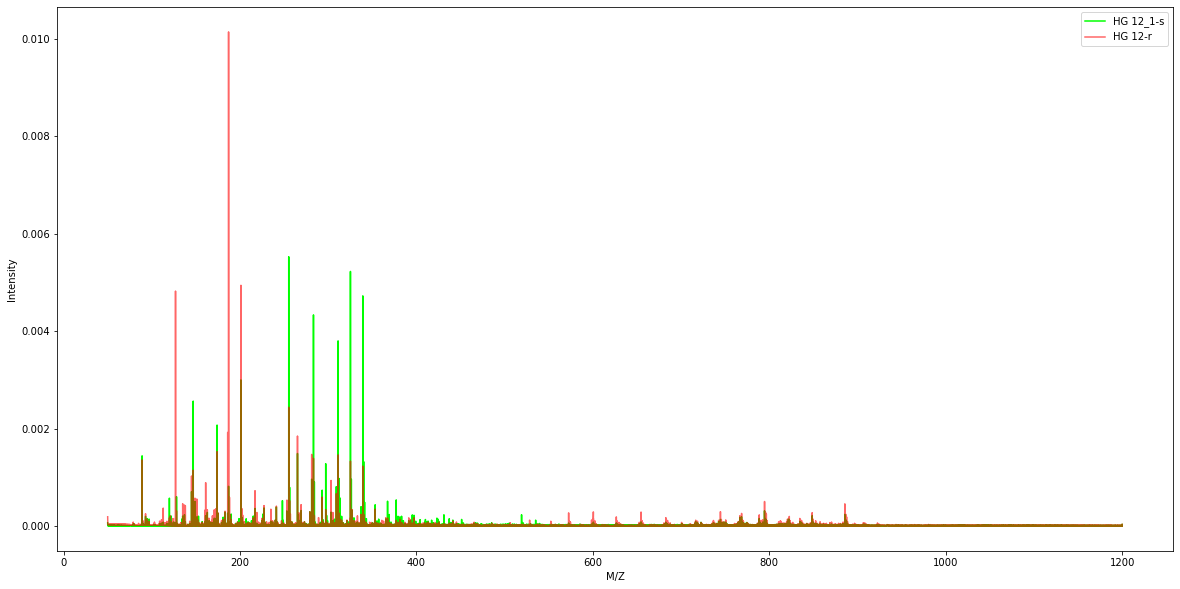

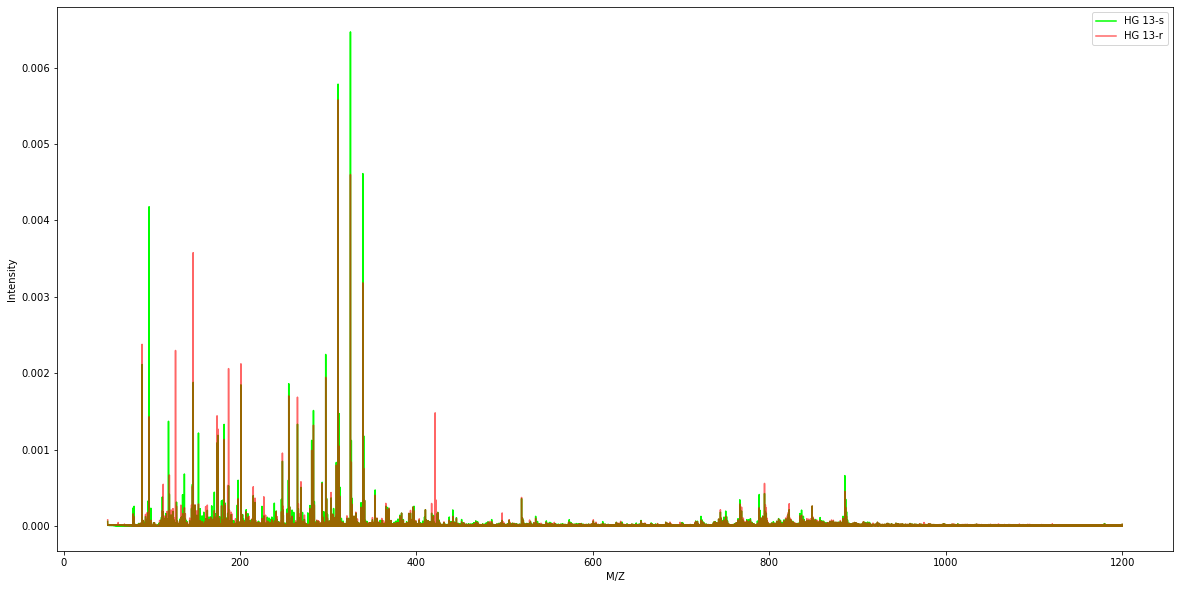

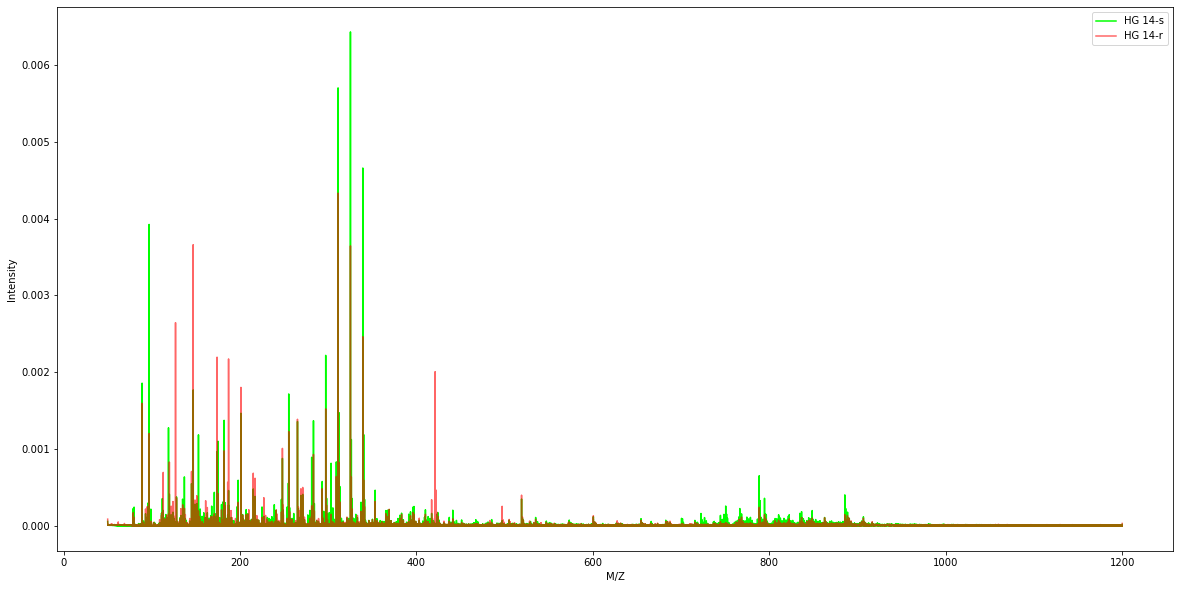

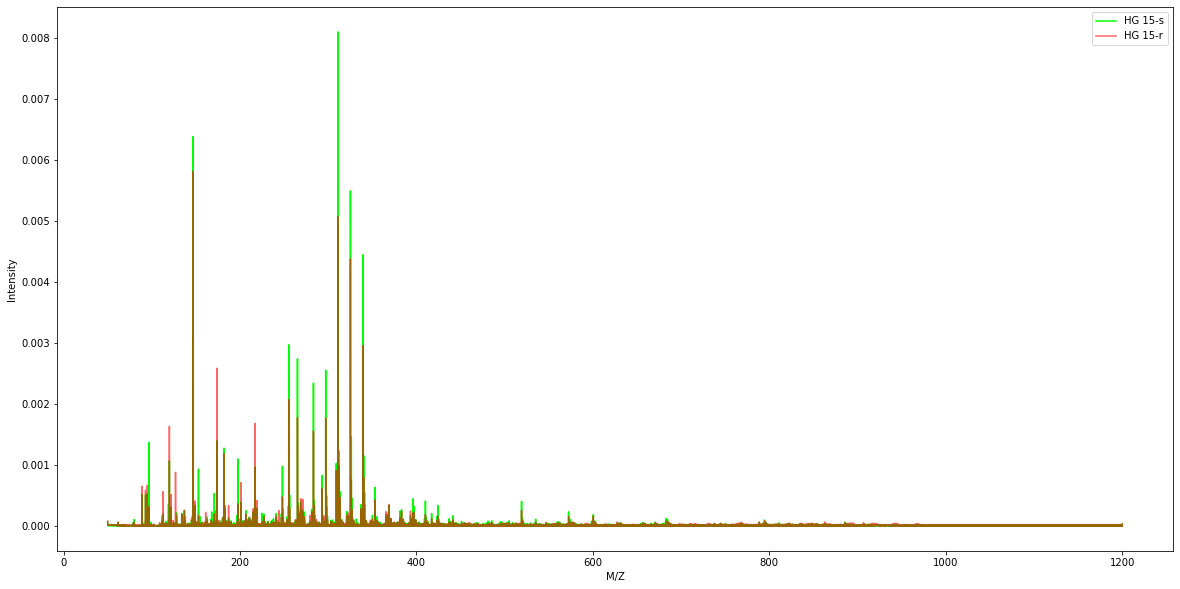

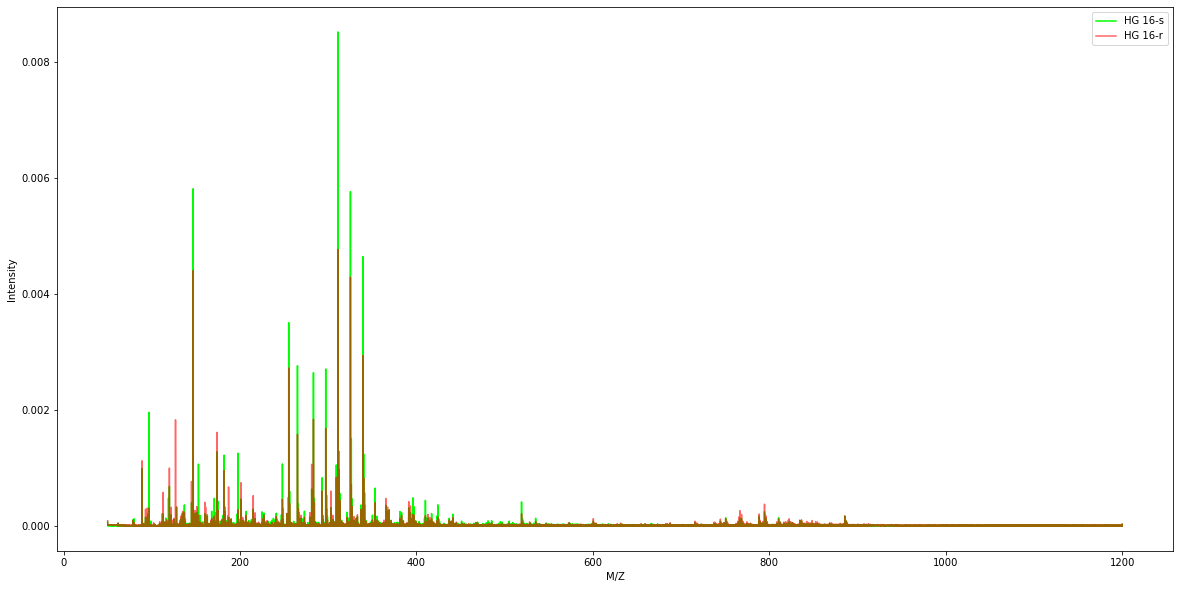

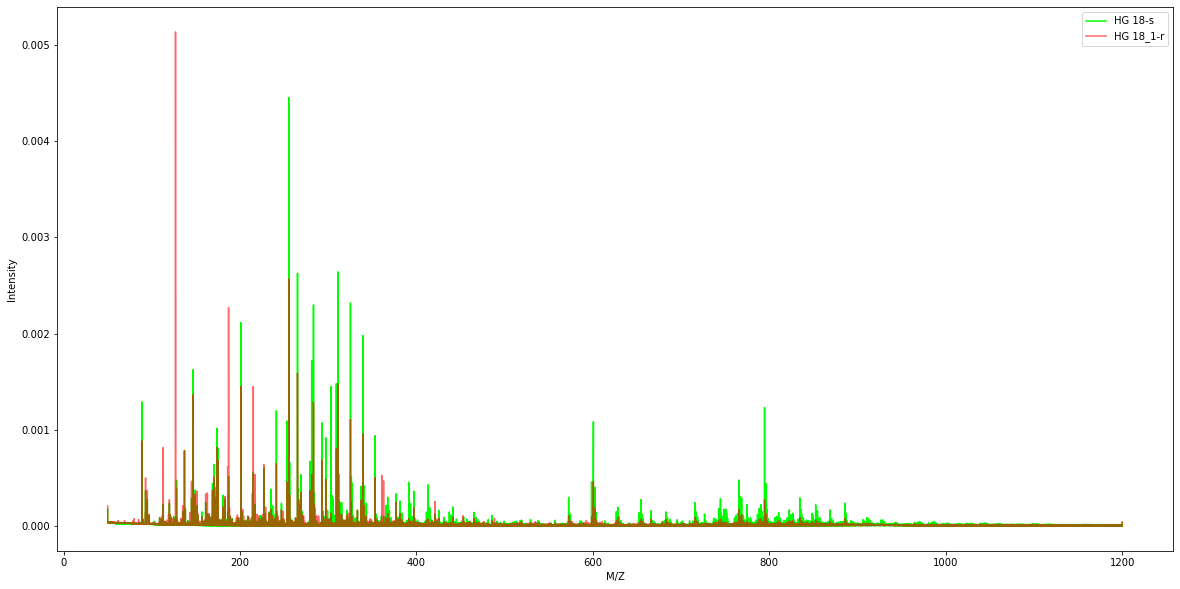

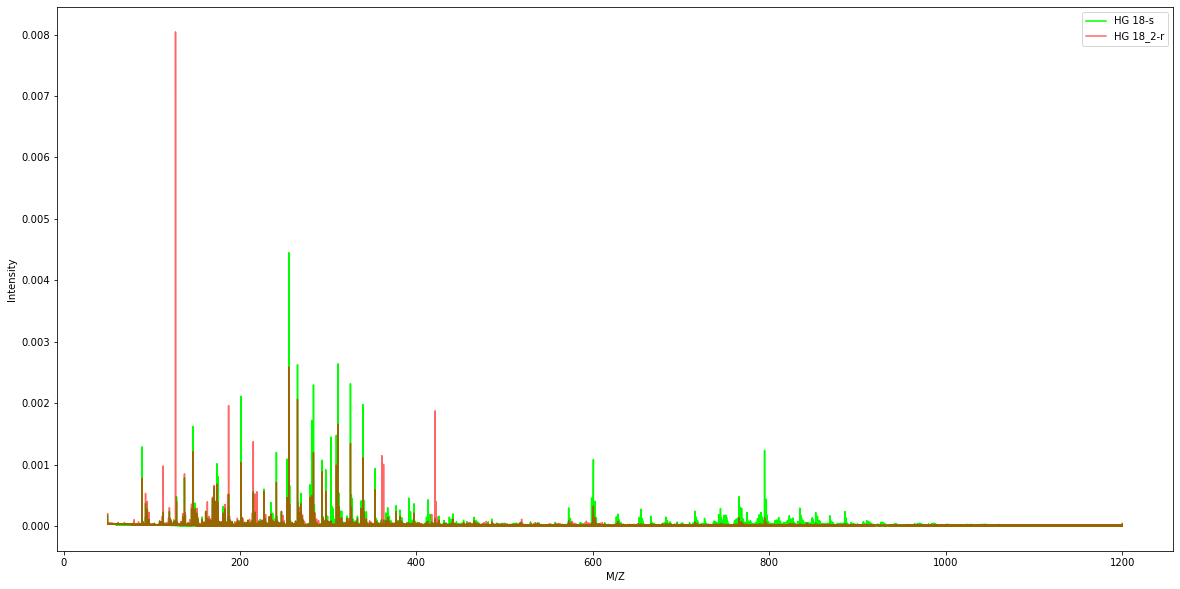

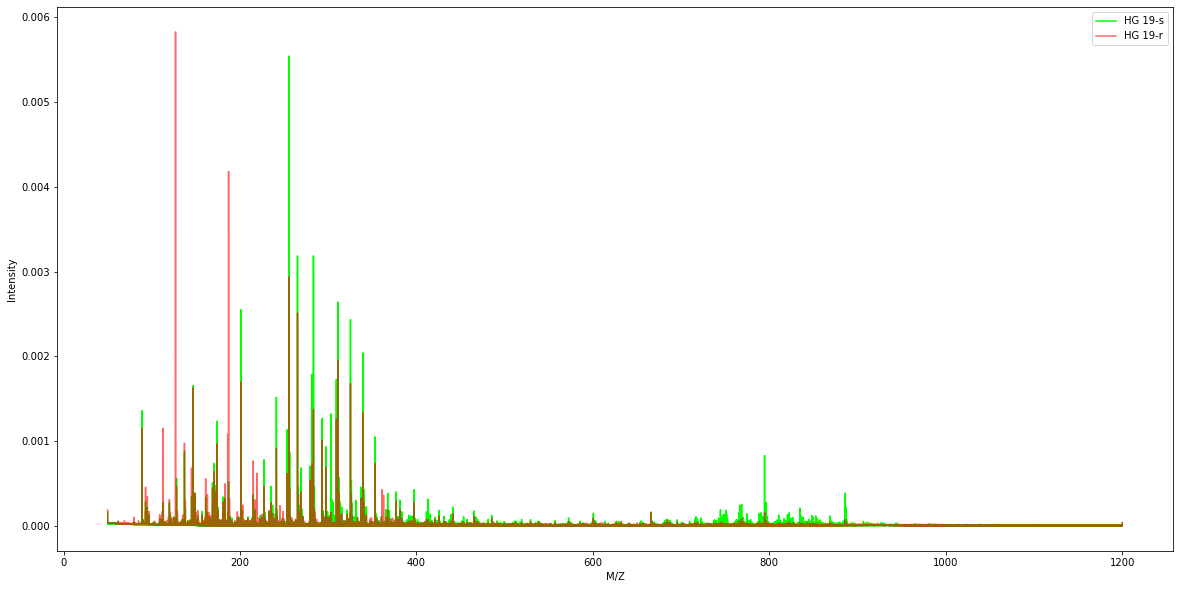

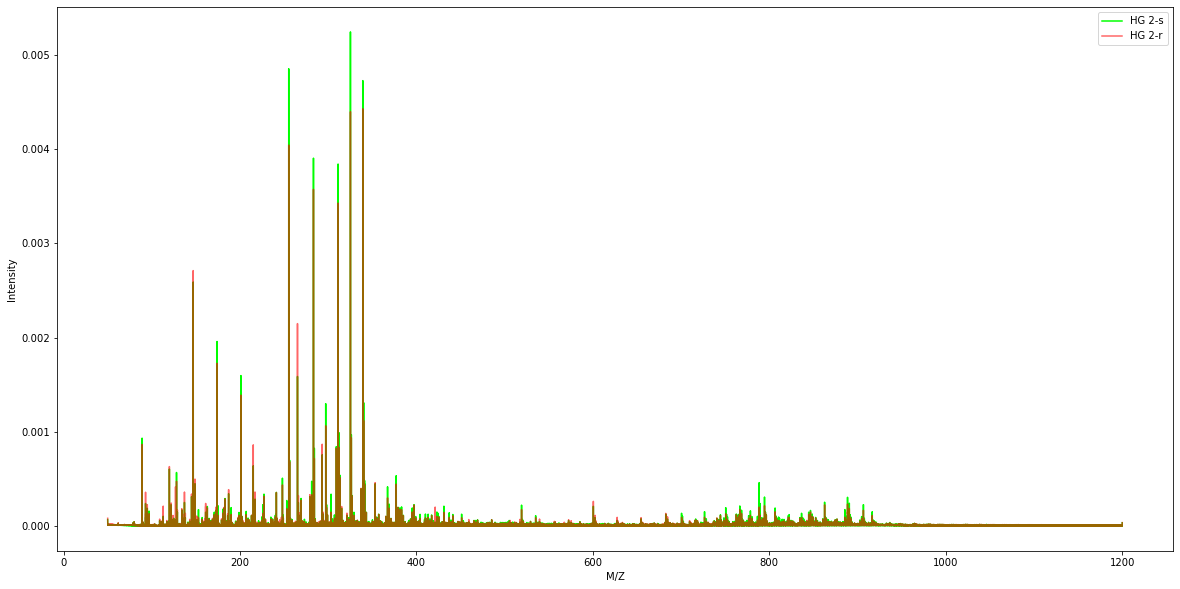

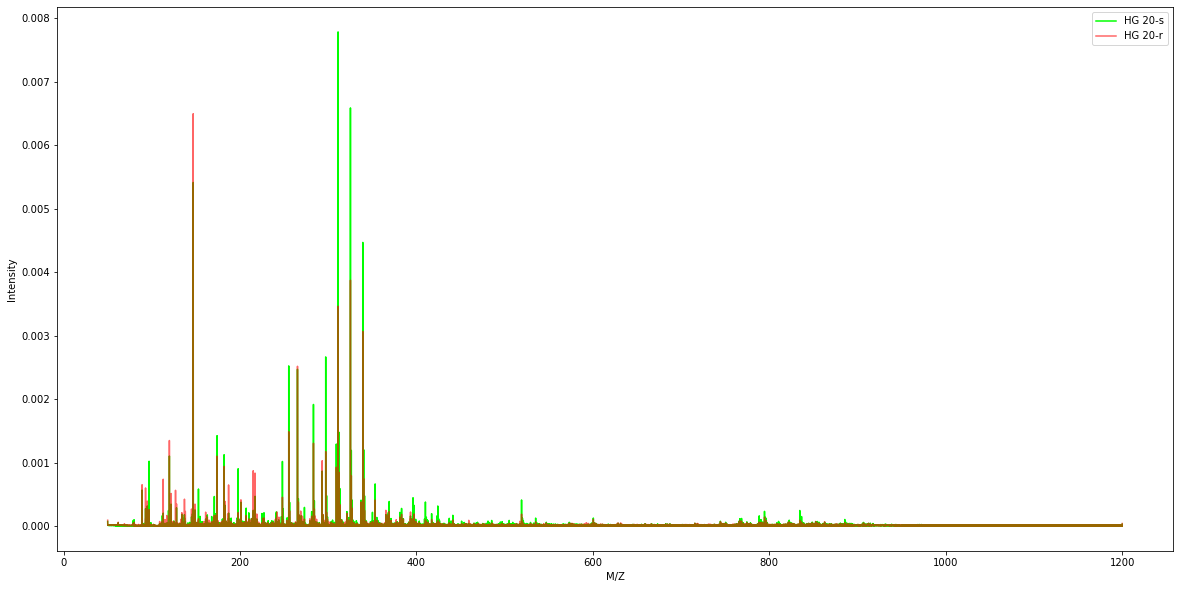

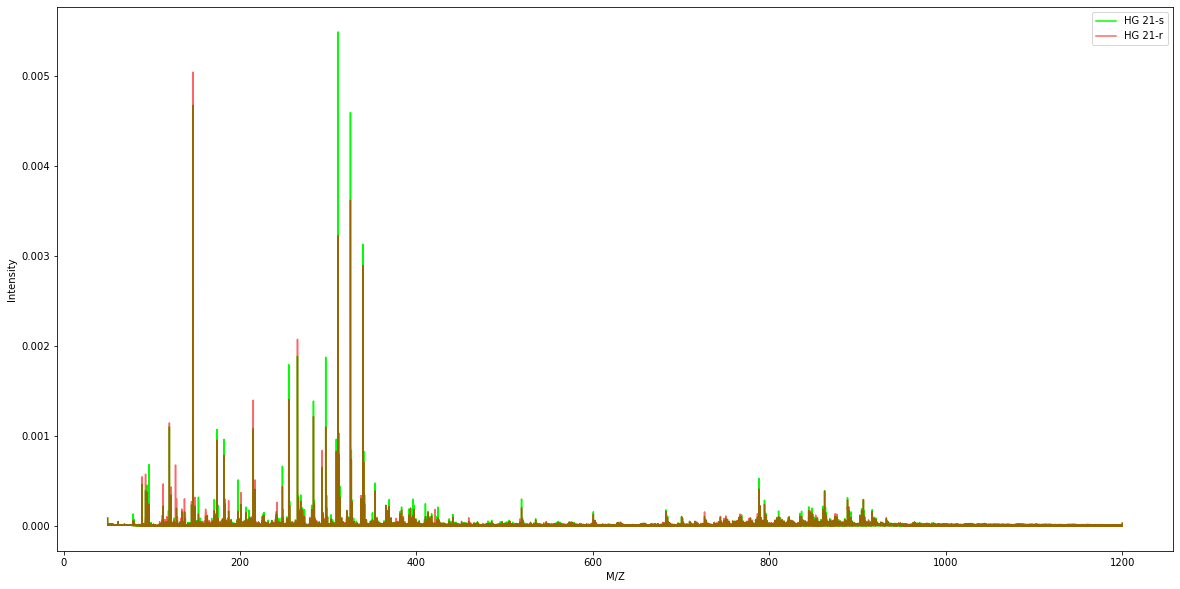

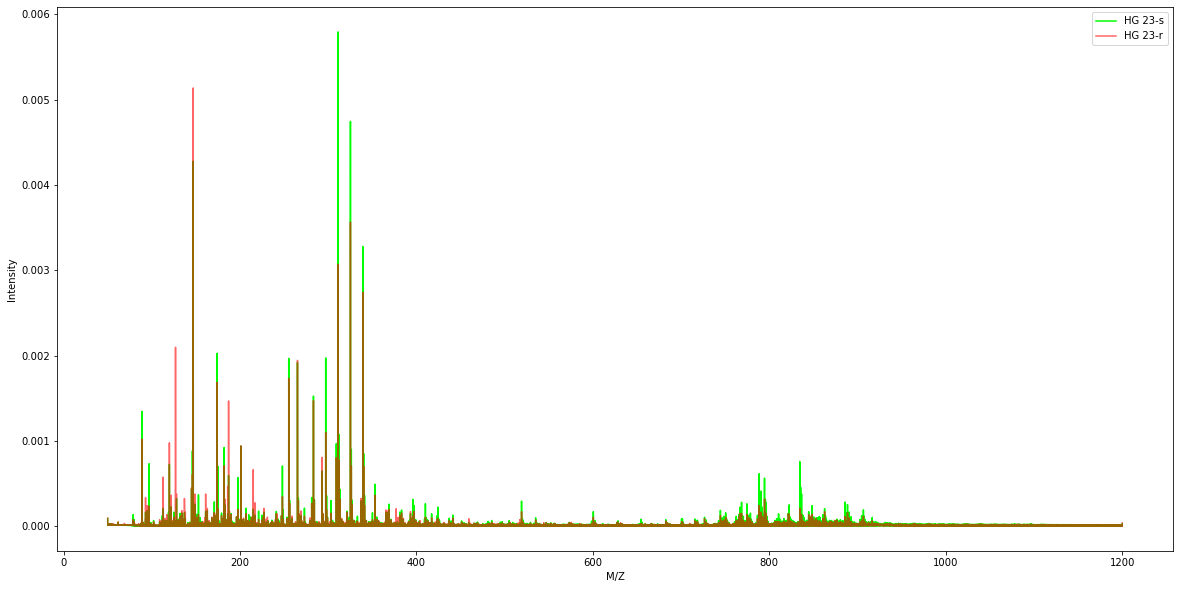

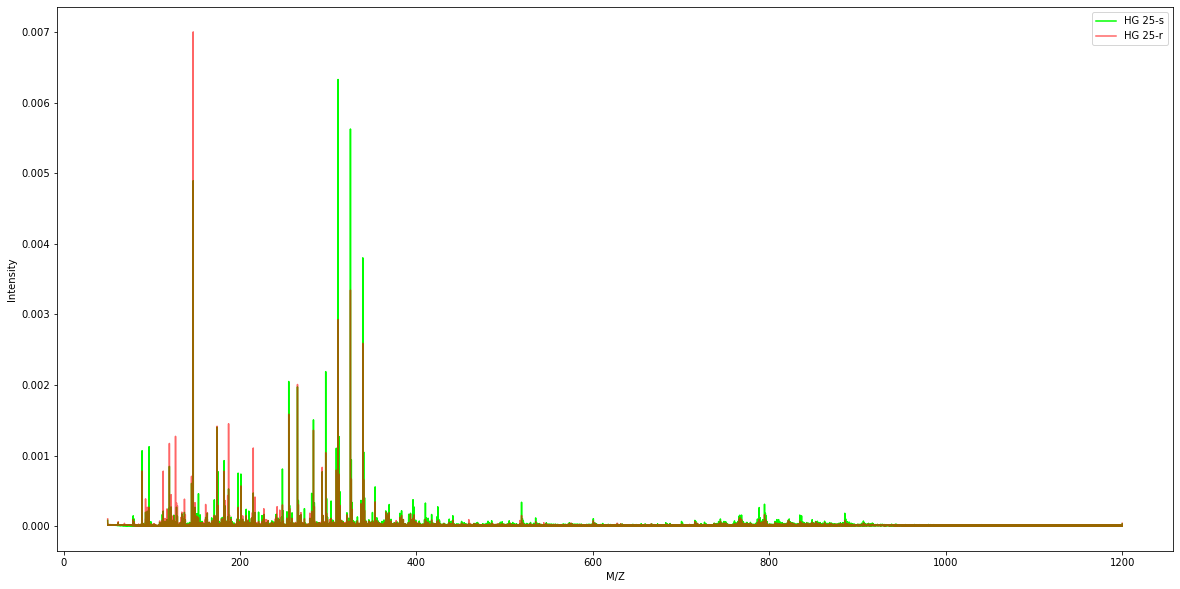

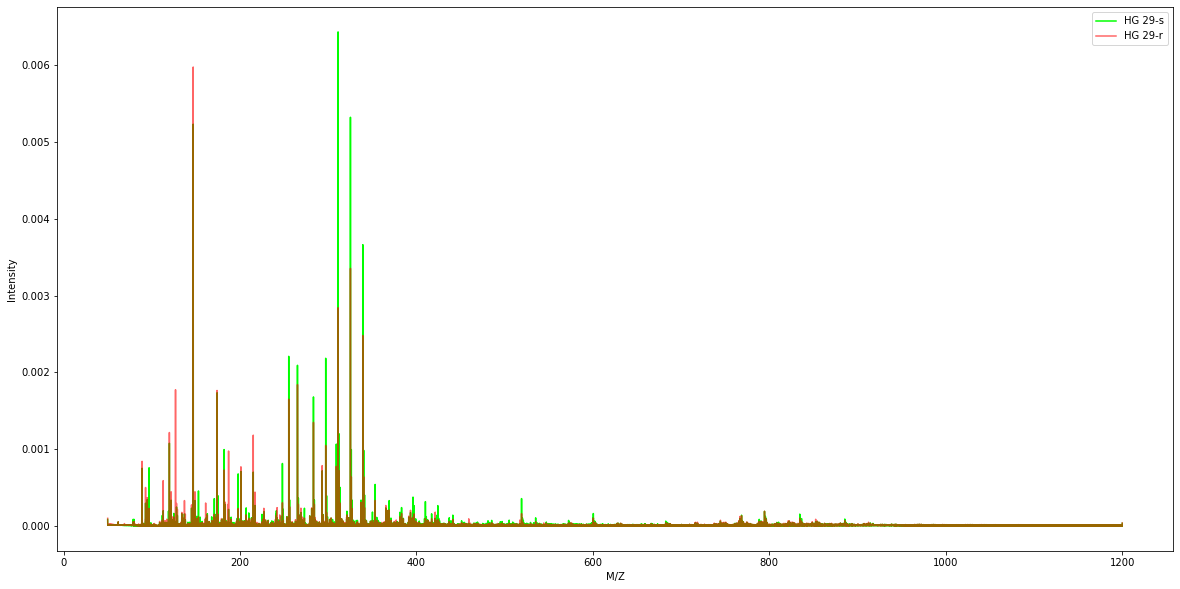

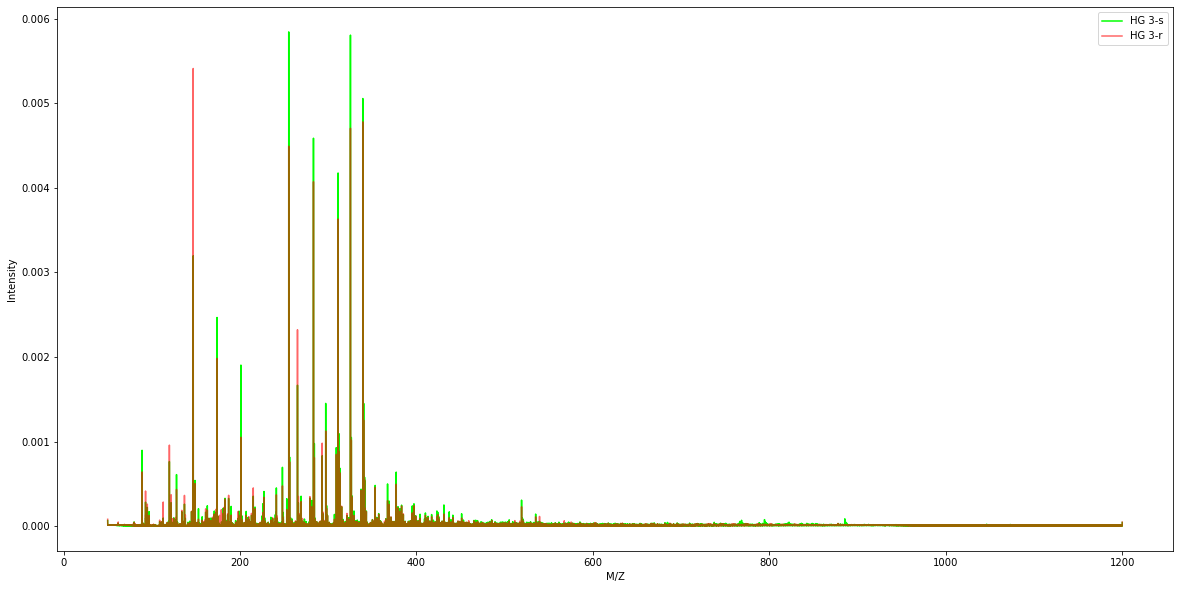

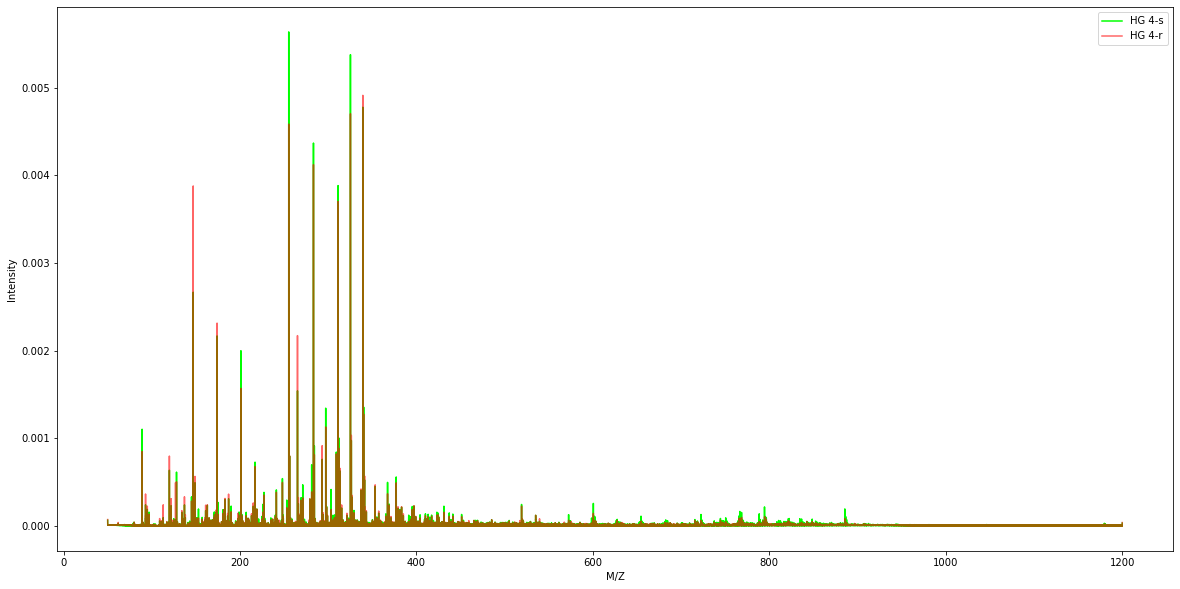

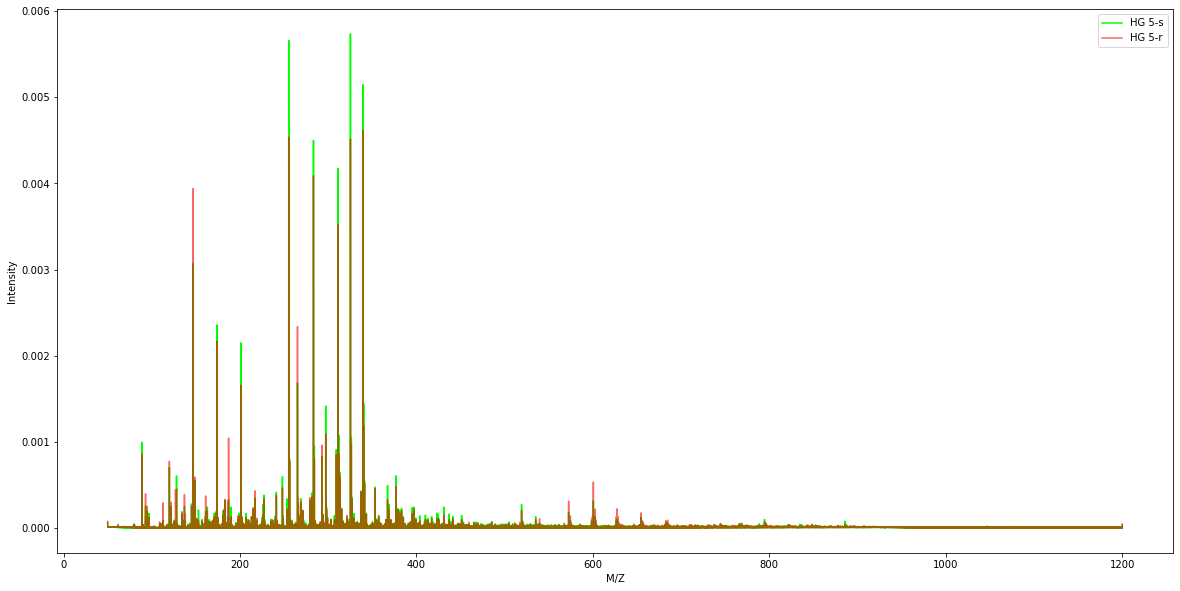

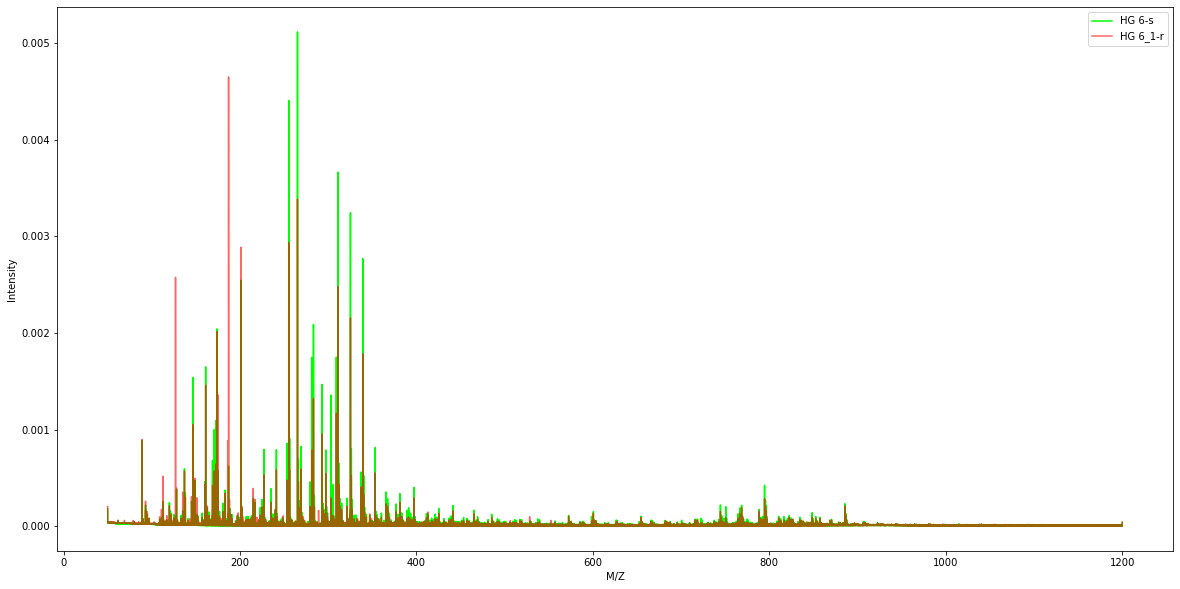

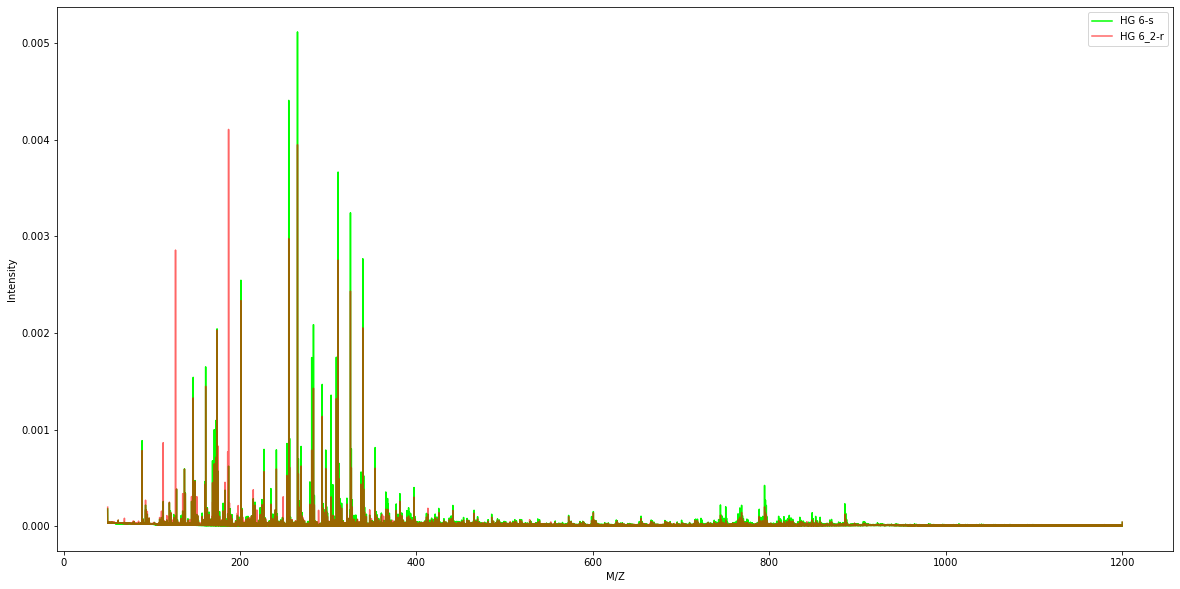

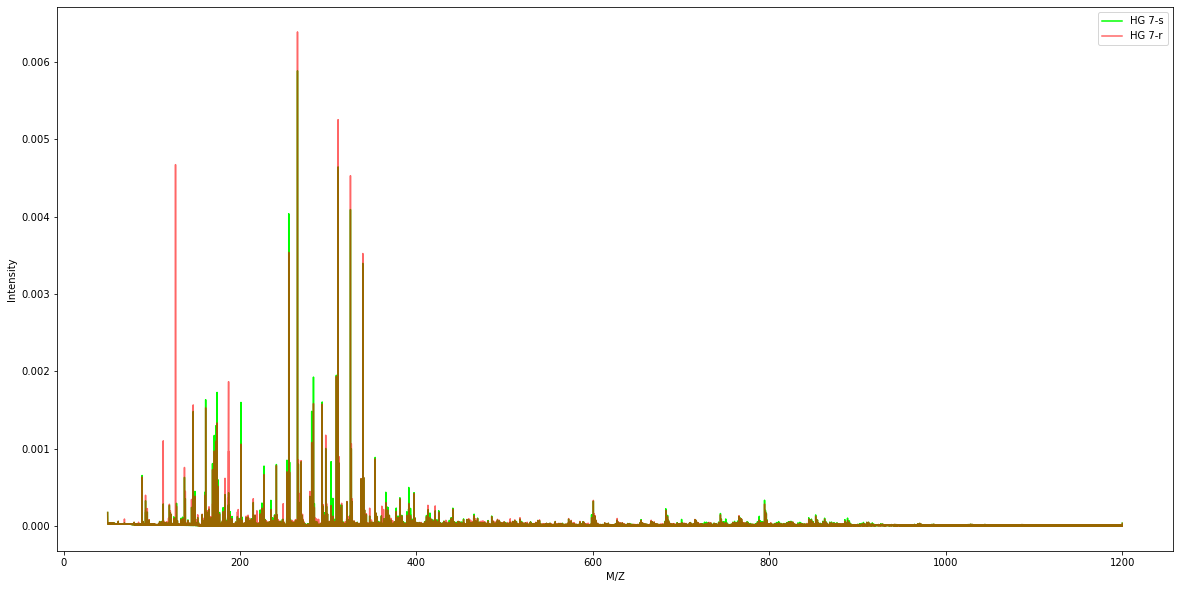

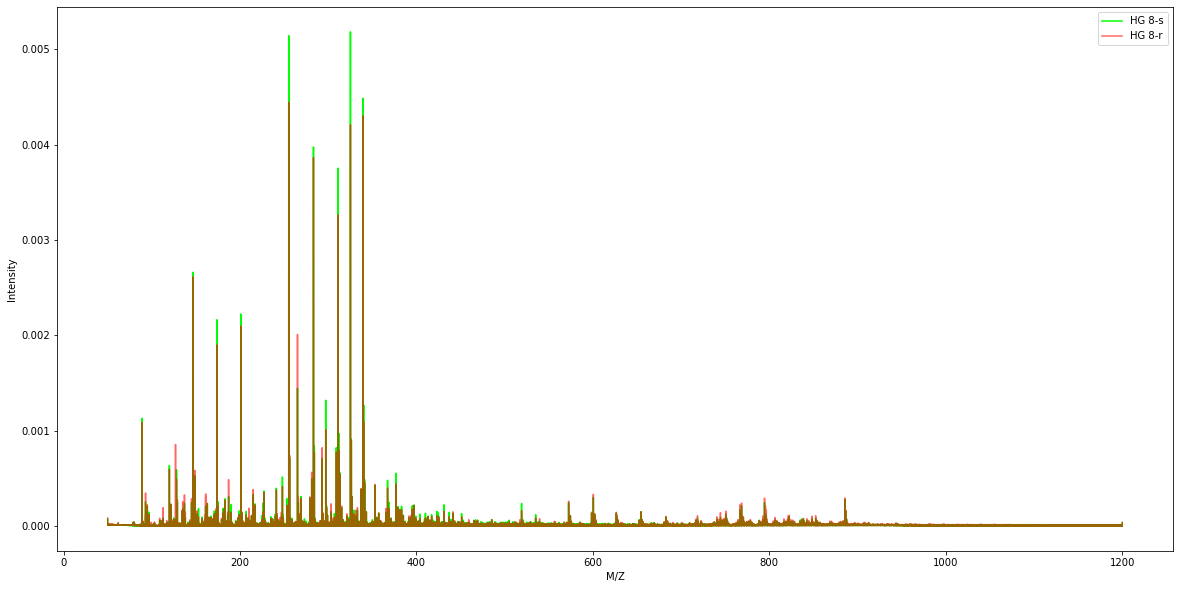

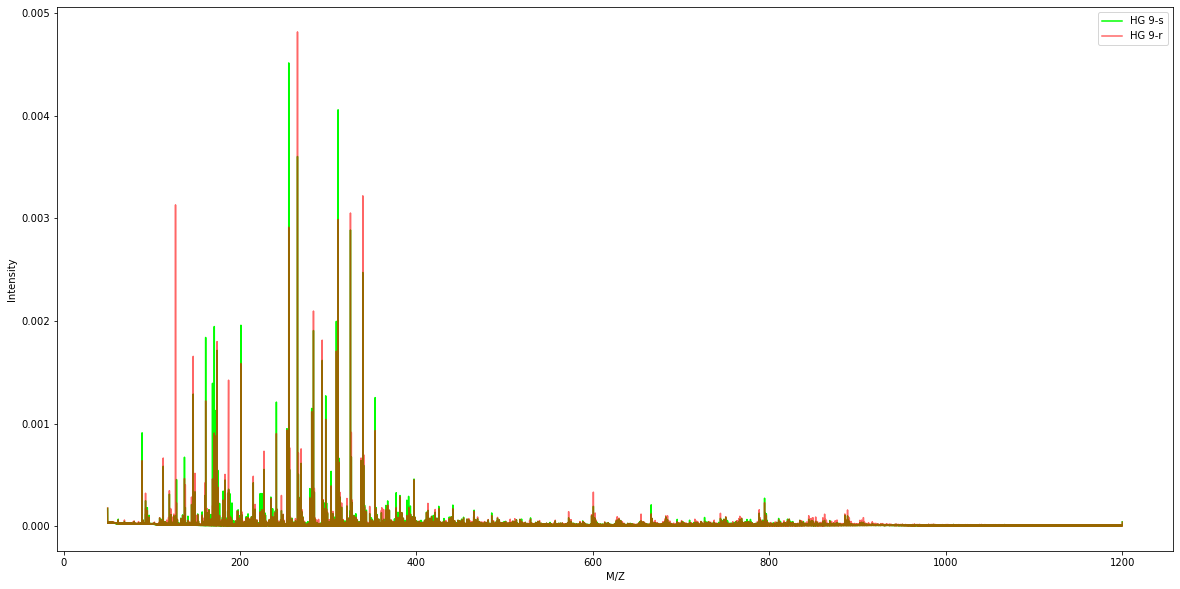

In [68]:
for key, val in mean_spectras.items():
  if "s" in key:
    key_num = key.replace('HG ', "").replace("_", "-").split('-')[0]
    for key_2, val_2 in mean_spectras.items():
      key2_num = key_2.replace('HG ', "").replace("_", "-").split('-')[0]
      if key_num == key2_num and key!=key_2:
        plt.figure(figsize=(20, 10))
        plt.plot(mzs, val, label=key, color=[0, 1, 0,1])
        plt.plot(mzs, val_2, label=key_2, color=[1, 0, 0,0.6])
        # plt.plot(mzs, np.minimum(val, val_2), label="Overlap", color="brown")
        plt.xlabel("M/Z")
        plt.ylabel("Intensity")
        plt.legend()
        plt.show()